# Exploring Why Civil Resistance Works


- In this notebook, we will use data from the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX) dataset to explore the question of why civil resistance works. Inspired by the famous book by Erica Chenoweth and Maria Stephan, we will explore the question of why civil resistance is more effective than violent resistance by examining prominent campaigns from 1945 to 2013 and reproduce some of the results from their book including the famous 3.5% rule. 

- First, we will import the necessary libraries, load and inspect the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read .tab file into pandas dataframe
campaigns = pd.read_csv('../assignment_2023_2/NAVCO 1.2 Updated.tab', sep='\t')
campaigns.head(5)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


- Let's take a look at the columns in the dataset.

In [4]:
campaigns.columns

Index(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL', 'DEFECT',
       'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype='object')

- Upon inspection, we notice a plethora of attributes. We will mainly focus on a few of them for our analysis.
- Specifically, we will mainly focus on the success of campaigns and their violent or nonviolent nature as well as total participation. 

## 1. Exploration of Historical Trends


- Let's examine the historical trends of campaigns throughout the years to get a sense of the data.

- We will create a plot showing the frequency of nonviolent and violent campaigns by decade stacked on top of each other. 

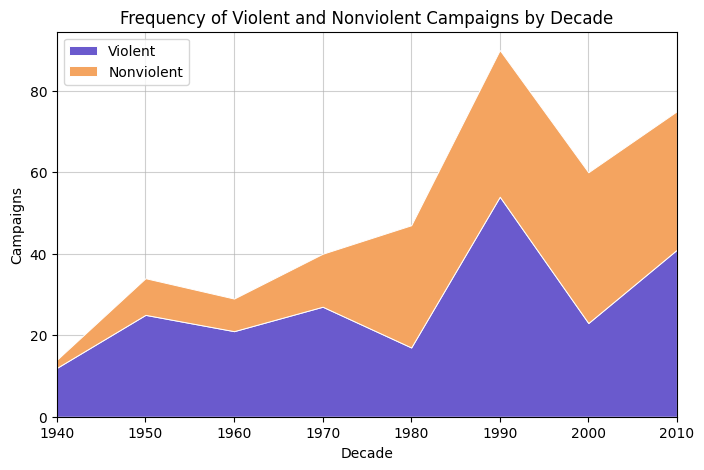

In [5]:
# Convert EYEAR to decades
campaigns['DECADE'] = (campaigns['EYEAR'] // 10) * 10

# Group by decade and count the occurrences of violent and nonviolent campaigns
counts = campaigns.groupby(['DECADE'])[['VIOL', 'NONVIOL']].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.stackplot(counts['DECADE'], counts['VIOL'], counts['NONVIOL'], labels=['Violent', 'Nonviolent'],
               colors=['slateblue', 'sandybrown'], linewidth=0.7, edgecolor='white')
plt.xlabel('Decade')
plt.ylabel('Campaigns')
plt.title('Frequency of Violent and Nonviolent Campaigns by Decade')
plt.legend(loc='upper left')
# adjust grid lines and set them behind plotted data
plt.gca().set_axisbelow(True)
# set x-axis limits to the min and max of the decade column
plt.xlim(counts['DECADE'].min(), counts['DECADE'].max())
plt.grid(True, alpha=0.6)
plt.show()


- As we can see, the number of both types of campaigns has increased over time with a big spike in the 1990s after the fall of the Soviet Union , signaling a rise in civil resistance. Moreover, we can see that the number of nonviolent campaigns has always surpassed the number of violent campaigns with the gap widening from the 2000s and onwards. Let's examine the success of these campaigns starting with the nonviolent ones.

- We will create a plot for each decade from 1940 onwards, showing the number of nonviolent campaigns and the percentage of success. Our plot has two vertical axes , one for the number of campaigns and one for the percentage of success to gain a better insight into the data.


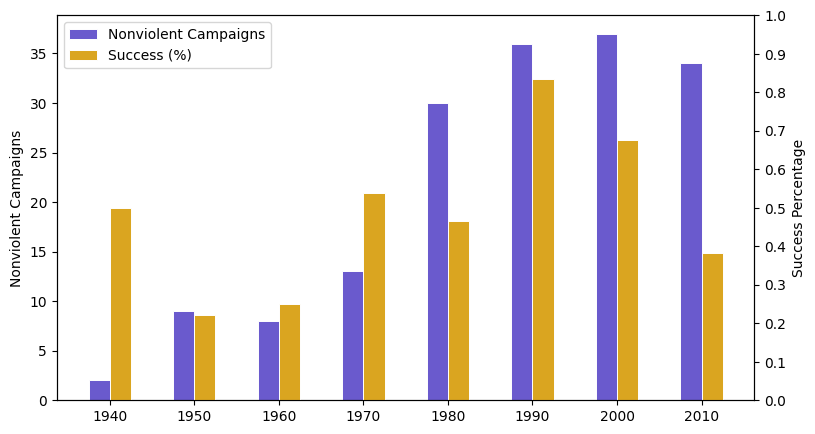

In [6]:
# Filter data from 1940 onwards
campaigns_filtered = campaigns[campaigns['EYEAR'] >= 1940]

# Calculate the counts of nonviolent campaigns per decade
campaigns_filtered['DECADE'] = (campaigns_filtered['EYEAR'] // 10) * 10

nonviolent_counts = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('DECADE').size()

# Convert index to integers
nonviolent_counts.index = nonviolent_counts.index.astype(int)  

# Calculate the mean success percentage per decade (scaled from 0 to 1)
# since the success metric is binary, the mean is the percentage of successful campaigns
# we also filter for nonviolent campaigns only
success_percentage = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('DECADE')['SUCCESS'].mean()

# Create bar plot for each decade with side-by-side bars for counts and success percentage
bar_width = 0.25
index = np.arange(len(nonviolent_counts))

fig, ax1 = plt.subplots(figsize=(9, 5))

# Plotting bars for counts of nonviolent campaigns
ax1.bar(index - bar_width/2, nonviolent_counts, bar_width, color='slateblue', label='Nonviolent Campaigns', linewidth=0.7, edgecolor='white')
ax1.set_ylabel('Nonviolent Campaigns')
ax1.set_xticks(index)
ax1.set_xticklabels(nonviolent_counts.index)

# Create a twin axis for success percentage (right)
ax2 = ax1.twinx()
# Plotting bars for success percentage
ax2.bar(index + bar_width/2, success_percentage, bar_width, color='goldenrod', label='Success (%)', linewidth=0.7, edgecolor='white')
ax2.set_ylabel('Success Percentage')
ax2.set_ylim(0, 1)  # Set the y-axis limit from 0 to 1
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks to represent the scaled range (0 to 1)

# Combine both legends and display
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.grid(False)
plt.show()


- We can see a clear trend in the nonviolent campaings with the number of campaigns increasing over time and the percentage of success peaking in the 1990s and 2000s and then reversing. This is in line with the previous plot showing the rise of nonviolent campaigns in the 1990s but presents a more nuanced picture. The percentage of success has been decreasing since the 2000s, which is a worrying trend. Let's examine the nonviolent next to the violent campaigns next.

- Next, we will create a plot showing the success rate for violent and nonviolent campaigns by decade.

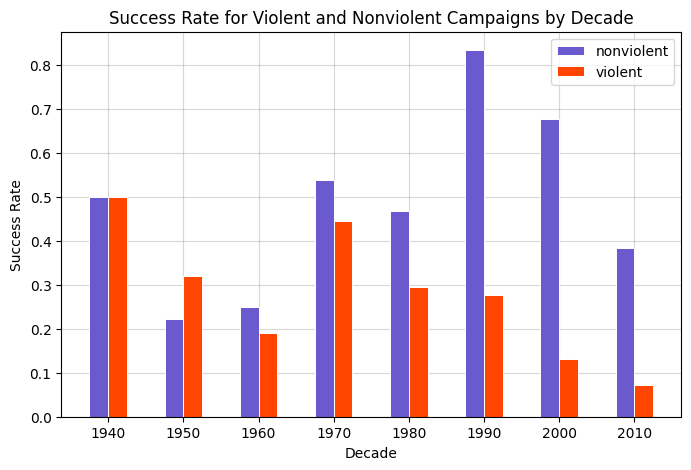

In [7]:
# needed data
# violent
violent_counts = campaigns_filtered[campaigns_filtered['VIOL'] == 1].groupby('DECADE').size()
# nonviolent
nonviolent_counts = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('DECADE').size()
# success percentage
success_percentage = campaigns_filtered.groupby('DECADE')['SUCCESS'].mean()

success_percentage_nonviolent = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('DECADE')['SUCCESS'].mean()
success_percentage_violent = campaigns_filtered[campaigns_filtered['VIOL'] == 1].groupby('DECADE')['SUCCESS'].mean()
num_decades = len(success_percentage_nonviolent)

# Create a line plot for success rates of violent and nonviolent campaigns by decade
plt.figure(figsize=(8, 5))

bar_width = 0.25

plt.bar(index - bar_width/2, success_percentage_nonviolent, bar_width, color='slateblue', label='nonviolent', linewidth=0.7, edgecolor='white')
plt.bar(index + bar_width/2, success_percentage_violent, bar_width, color='orangered', label='violent', linewidth=0.7, edgecolor='white')

# Labeling and customization
plt.xlabel('Decade')
plt.ylabel('Success Rate')
plt.title('Success Rate for Violent and Nonviolent Campaigns by Decade')
plt.xticks(np.arange(num_decades), success_percentage_nonviolent.index.astype(int))
plt.legend()
# adjust grid lines and set them behind plotted data
plt.gca().set_axisbelow(True)
plt.grid(True, alpha=0.5)
plt.show()


- As the years progress, nonviolent campaigns seem to have higher success probabilities. Especially after the 1940s and the 2nd World War, looks like people got tired of violence and started to prefer more peaceful means of resistance. Up until the modern era where violence has faded away and nonviolent campaigns are now the norm.

## 2. Largest Resistance Campaigns, 1946-2014

- Let's examine the largest campaigns in terms of participation and see if we can find any interesting patterns.

- We will create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%, with the color of the bar indicating the success status of the campaign.

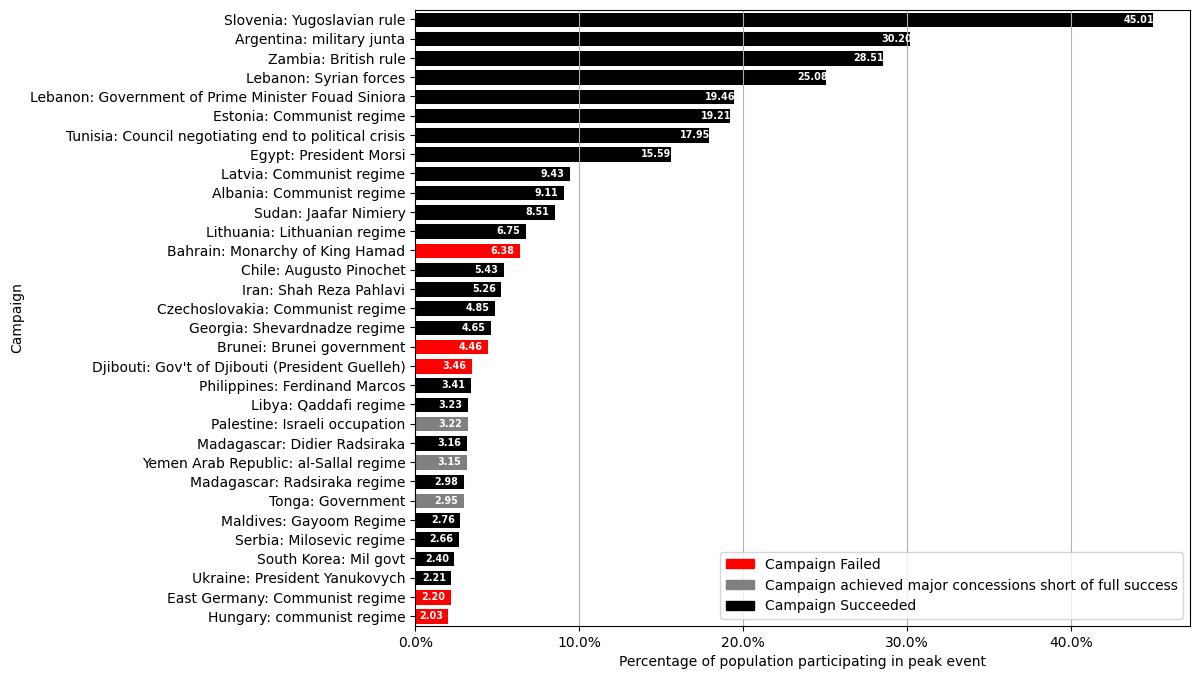

In [8]:
# Filter resistance campaigns with participation at least 2.0% and from 1946-2014
resistance_campaigns = campaigns[(campaigns['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02) & 
                                (campaigns['EYEAR'] >= 1946) & (campaigns['EYEAR'] <= 2014)]

# Sort values based on the participation percentage in descending order
resistance_campaigns_sorted = resistance_campaigns.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)

colors = []
for limited, failed, success in zip(resistance_campaigns_sorted['LIMITED'], resistance_campaigns_sorted['FAILURE'], resistance_campaigns_sorted['SUCCESS']):
    if limited == 1:
        colors.append('grey')  # Campaign had limited success
    elif failed == 1:
        colors.append('red')  # Campaign failed
    elif success == 1:
        colors.append('black')  # Campaign succeeded
    else:
        colors.append('white')  # Default color for unknown status (change as needed)

# Create a horizontal bar plot with modified colors and titles
plt.figure(figsize=(10, 8))
bars = plt.barh(resistance_campaigns_sorted['LOCATION'] + ': ' + resistance_campaigns_sorted['TARGET'],
                resistance_campaigns_sorted['PERCENTAGEPOPULARPARTICIPATION'],
                color=colors, edgecolor='white', linewidth=0.7)

# labels and grid
plt.xlabel('Percentage of population participating in peak event')
plt.ylabel('Campaign')
plt.grid(axis='x')

# Show legend based on success status
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='red', label='Campaign Failed'),
                    plt.Rectangle((0, 0), 1, 1, color='grey', label='Campaign achieved major concessions short of full success'),
                    plt.Rectangle((0, 0), 1, 1, color='black', label='Campaign Succeeded')],
           loc='best')

# remove extra whitespace on upper and lower ends of plot
plt.ylim(-0.5, len(resistance_campaigns_sorted)-0.5)

# Add text labels and adjust their alignment
for i, bar in enumerate(bars):
    plt.text(bar.get_width() - 0.018, bar.get_y() + bar.get_height()/2, f'{resistance_campaigns_sorted.iloc[i]["PERCENTAGEPOPULARPARTICIPATION"] * 100:.2f}', ha='left',
             va='center', color='white', fontsize='x-small' , fontweight='bold')
    
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))


plt.show()


- The plot contains all major campaigns of the last 70 years.
- The largest campaigns have clearly succeded with only a few outliers presenting partial success or failure. 
- The campaign with the highest participation by far is the resistance of Slovenia against the Yugoslavian rule, possibly reffering to the [Ten-Day War](https://en.wikipedia.org/wiki/Ten-Day_War) in 1991 that got its name  from the brief duration of the armed conflict. 

## Greek campaigns

In [9]:
greek_campaigns = campaigns[campaigns['LOCATION'] == 'Greece']
greek_campaigns

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,DECADE
119,401.0,Greek Civil War,Greece,1946.0,1949.0,British and US occupation,0.0,0.0,1.0,0.0,...,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0,1940.0
120,89.0,Greek anti-military,Greece,1973.0,1974.0,Military rule,1.0,0.0,0.0,0.0,...,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0,1970.0


Digging around for Greek campaigns, we find only 2 entries in the dataset. One for the [Greek anti-military campaign against the junta of 1967–1974](https://en.wikipedia.org/wiki/Greek_junta#Anti-junta_movement) and one for the [Greek civil war](https://en.wikipedia.org/wiki/Greek_Civil_War). Let's examine them in more detail.

- For the anti-military campaign, one interesting thing to note is that despite the small percentage of participation , totaling to just 0.00027% of the population , and the relatively short duration, the campaign was a success. 

- For the civil war, we can see that the participation was much higher, totaling to 0.005% of the population. However, the campaign was a failure and left greece highly polarized for years to come.

## 3. The Effect of Participation on the Probability of Campaign Success


- We will examine the effect of participation on the probability of campaign success. We will run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. 

- To calculate the membership per capita metric for each campaign, we will use the formula provided in the previous version of the NAVCO dataset found [here](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/YLLHEE/GERY7X&version=1.0).


- According to the appendix the formula is:

- membershipPerCapita = $\frac{\ln(\text{participation})}{\ln(\text{population})}$

- We will also need the population of the country at the time of the campaign. We can easily get that by dividing the number of participants with the percentage of participation.

In [10]:
# import statsmodels
from statsmodels.formula.api import logit

# filter campaigns with very low participation
campaigns = campaigns[campaigns['PERCENTAGEPOPULARPARTICIPATION'] >= 0.000000035]

# calculate membership per capita = log(participation) / log(population)

# Population calculation
# PERCENTAGEPOPULARPARTICIPATION is participation/population
# so Population = PARTICIPATION / PERCENTAGEPOPULARPARTICIPATION
campaigns['POPULATION'] = campaigns['PARTICIPATION'] / campaigns['PERCENTAGEPOPULARPARTICIPATION']

# calculate logged population
campaigns['LOGPOPULATION'] = np.log(campaigns['POPULATION'])

# calculate logged participation
campaigns['LOGPARTICIPATION'] = np.log(campaigns['PARTICIPATION'])

# calculate membership per capita
campaigns['MEMBERSHIPPERCAPITA'] = campaigns['LOGPARTICIPATION'] / campaigns['LOGPOPULATION']

# get data for regression
reg_data = campaigns[['SUCCESS', 'MEMBERSHIPPERCAPITA', 'LOGPOPULATION']]

# logit model
model = logit("SUCCESS ~ MEMBERSHIPPERCAPITA + LOGPOPULATION", data=reg_data).fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6
                          Results: Logit
Model:               Logit            Method:           MLE       
Dependent Variable:  SUCCESS          Pseudo R-squared: 0.130     
Date:                2023-12-04 11:47 AIC:              447.3747  
No. Observations:    380              BIC:              459.1952  
Df Model:            2                Log-Likelihood:   -220.69   
Df Residuals:        377              LL-Null:          -253.58   
Converged:           1.0000           LLR p-value:      5.1893e-15
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
Intercept           -2.8142   1.4961 -1.8811 0.0600 -5.7465 0.1180
MEMBERSHIPPERCAPITA  7.6475   1.1664  6.5563 0.0000  

- We will plot the results of the logistic regression as a scatter plot.

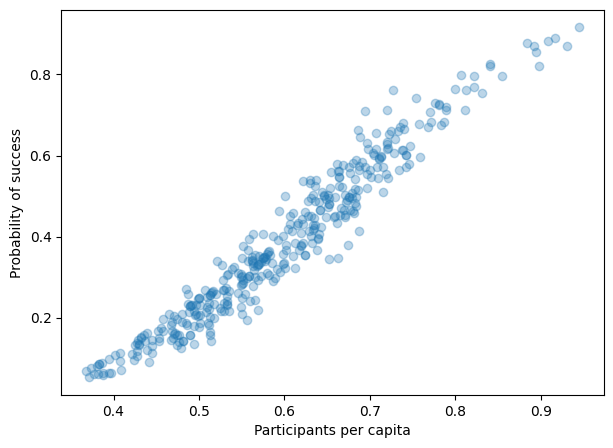

In [11]:
x_values = reg_data['MEMBERSHIPPERCAPITA']
y_values = model.predict(reg_data[['MEMBERSHIPPERCAPITA', 'LOGPOPULATION']])

# plot
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, alpha=0.3)
plt.xlabel('Participants per capita')
plt.ylabel('Probability of success')
plt.show()

- Right after running the regression, we can see that the coefficient for the membership per capita is positive (coef = 7.64) and statistically significant (p-value = 0.000). This means that the more people participate in a campaign, the more likely it is to succeed. This is in line with our intuition and the results of the previous plots. The pseudo R-squared of the model is 0.13 which is not that high but still indicates that the model is satisfactory since values in [range 0.2-0.4 are considered good fits](https://stats.stackexchange.com/questions/82105/mcfaddens-pseudo-r2-interpretation) for logistic regression models.

- The result is augmented by the presence of the control variable for the population of the country at the time of the campaign. The coefficient for the population is negative (coef = -0.1388) and statistically significant (p-value = 0.0591). This helps reduce bias, as the population is held constant to better isolate the relationship between the main predictor i.e the participants per capita and the outcome variable i.e the success of the campaign.

- In terms of probabilities, we extract from the model that one unit increase in Membership per Capita is associated with  an increase of 7.64 in the log odds of success. From the model, we also get that the propability of success is equal to:

$$ p(x) = \frac {1}{1+e^{-(-2.814 + 7,6475 x - 0.1388 z)}} $$

- Where x is the Membership per Capita and z is the population of the country at the time of the campaign.
From that we can calculate the probability of success for a campaign with various levels of participation and population.


- The graph also presents a leniar relationship between the probability of success and the membership per capita with the points forming a conceptual straight line. This is in line with the results of the logistic regression.

- Next, we will do the same but without the control variable for the population of the country at the time of the campaign.

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   SUCCESS          Pseudo R-squared: 0.123     
Date:                 2023-12-04 11:47 AIC:              449.0222  
No. Observations:     380              BIC:              456.9026  
Df Model:             1                Log-Likelihood:   -222.51   
Df Residuals:         378              LL-Null:          -253.58   
Converged:            1.0000           LLR p-value:      3.2041e-15
No. Iterations:       6.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           -5.3469   0.7095 -7.5362 0.0000 -6.7375 -3.9563
MEMBERSHIPPERCAPITA  8.0495   1.1414  7.0

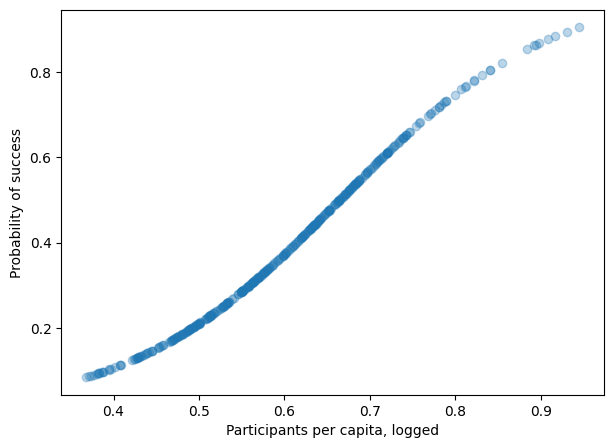

In [12]:
# logit model
model = logit("SUCCESS ~ MEMBERSHIPPERCAPITA ", data=reg_data).fit()
print(model.summary2())

# get predicted probabilities
x_values = reg_data['MEMBERSHIPPERCAPITA'] 
y_values = model.predict(reg_data)

# plot
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, alpha=0.3)
plt.xlabel('Participants per capita, logged')
plt.ylabel('Probability of success')
plt.show()

- Running the regression again without the control variable for the population, we get a similar result in terms of coefficient values and statistical significance. The pseudo R-squared of the model is 0.12 which is slightly lower than the previous model. This is to be expected, because a portion of the variance is now unexplained. However, the model is still satisfactory.

- The main differece is that the points are now less spread out and form a tighter cluster around the conceptual line. This emphasizes the positive correlation between the probability of success and the membership per capita , leaving less room for other factors to influence the outcome and thus, reducing the variance and 'noise' created by the control variable.
- The sigmoid shape of the conceptual line is also more apparent and in line with the expected results of the logistic regression. As the data is fitted to the logistic function, the probability of success increases rapidly at first and then slows down as the membership per capita increases and approaches the top of the curve.

# 4. Participation tipping point

- We will now try to reproduce the famous 3.5% rule. According to the book, the rule is defined as "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event".

- Firstly, we will create a table to get an idea of the participation levels of the campaigns in the dataset by binning them into 7 categories.

In [13]:
# # Define bins based on participation percentages
bins = [0, 0.000035, 0.00015, 0.0006, 0.0025, 0.01 , 0.035, float('inf')]
bin_labels = [ 'less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5% ', 'greater than 3.5%']

# Assign each observation to a bin based on 'Peak Popular Participation (%)'
campaigns['PARTICIPATION_BIN'] = pd.cut(campaigns['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=bin_labels, right=False)

# Group data by participation bins and calculate success rate
campaigns_grouped_on_bins = campaigns.groupby('PARTICIPATION_BIN')['SUCCESS'].agg(['count', 'mean']).reset_index()
campaigns_grouped_on_bins.rename(columns={'count': 'Observations', 'mean': 'Success Rate'}, inplace=True)

# transform the success rate to percentage
campaigns_grouped_on_bins['Success Rate'] = campaigns_grouped_on_bins['Success Rate'] * 100 

# rename PARTICIPATION_BIN to 'Peak Popular Participation (%)'
campaigns_grouped_on_bins.rename(columns={'PARTICIPATION_BIN': 'Peak Popular Participation (%)'}, inplace=True)

# limit success rate to 2 decimal places and place a '%' sign after the value
campaigns_grouped_on_bins['Success Rate'] = campaigns_grouped_on_bins['Success Rate'].apply(lambda x: f'{x:.2f}%')

# remove index from the left of the dataframe
campaigns_grouped_on_bins.reset_index(drop=True, inplace=True)

# reverse the order of the bins and hide the index
campaigns_grouped_on_bins  = campaigns_grouped_on_bins[::-1].style.hide(axis='index')

- We will display the table in an html format.

In [14]:
from IPython.display import HTML

html_table = campaigns_grouped_on_bins.to_html(index=False, escape=False)
html_table = html_table.replace('<table border="1" class="dataframe">', '<table>')  # Remove border and class
# display
HTML(html_table)

Peak Popular Participation (%),Observations,Success Rate
greater than 3.5%,18,88.89%
1.0% - 3.5%,41,60.98%
0.25% - 1.0%,92,45.65%
0.06% - 0.25%,95,45.26%
0.015% - 0.06%,66,24.24%
0.0035% - 0.015%,44,9.09%
less than 0.0035%,24,4.17%


- An interesting finding is that depsite the claim of the rule, the 18 observations with participation levels above 3.5% are not all successes. In fact, 2 resulted in failure. This seems to be a violation of the rule. What could be the reason for this? Let's examine the campaigns in more detail.

In [15]:
# failed 3.5% campaigns
failed_campaigns = campaigns[(campaigns['PERCENTAGEPOPULARPARTICIPATION'] >= 0.035) & (campaigns['SUCCESS'] == 0)]
failed_campaigns[['LOCATION', 'TARGET', 'BYEAR', 'EYEAR', 'SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION']]

,LOCATION,TARGET,BYEAR,EYEAR,SUCCESS,PERCENTAGEPOPULARPARTICIPATION
19,Bahrain,Monarchy of King Hamad,2011.0,2014.0,0.0,0.063816
34,Brunei,Brunei government,1962.0,1962.0,0.0,0.044641


- The first failed campaign is [2011 Bahraini uprising](https://en.wikipedia.org/wiki/2011_Bahraini_uprising) the  which was a series of anti-government protests in Bahrain that expanded to a call to end the monarchy of Hamad bin Isa Al Khalifa.

- The second failed campaign is the [Brunei rebellion of 1962](https://en.wikipedia.org/wiki/Brunei_revolt) which was an armed uprising against the British colonial government of Brunei in December 1962.

- All seem to be anti-goverment campaigns that got supressed by goverment and military forces. This could be the reason for their failure despite the high participation levels. Other factors cpuld be the low population of the countries at the time of the campaigns and the short duration of the campaigns. A better analysis from Chenoweth can be found [here](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf).

### Deriving the 3.5% rule from our model 

- Since we constructed a model for the probability of success based on the participation levels, we can use it to derive the 3.5% rule in a more statistical way.

- The [0.025, 0.975] values in the Statsmodels ```summary()``` function represent the lower and upper bounds of a 95% confidence interval for each coefficient.This means that there is a 95% probability that the true value of the coefficient lies within this interval. Since our model does not reach the 99% probability mark needed for our analysis, we can use these values to calculate the 3.5% rule as follows:

1. We will consider using the upper bound of the coefficients to bump up our prediction success percentage.
2. From the model with the new coefficients, we will calculate the membership per capita levels needed to reach a 99% probability of success.
3. Having obtained the needed membership per capita levels, we will examine our original campaign data to see which campaigns have a membership per capita number at or above our finding. For those campaigns, we will examine their participation levels and the lowest one of those is the tipping point of participation needed to reach a 99% probability of success.


- Let's examine the output of the summary() function one more time. 
- We will use the model with only the membership per capita as an independent variable since it is simpler to explain and interpret.

In [16]:
from scipy.special import expit  # expit is the logistic function

model = logit("SUCCESS ~ MEMBERSHIPPERCAPITA ", data=reg_data).fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6
                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   SUCCESS          Pseudo R-squared: 0.123     
Date:                 2023-12-04 11:47 AIC:              449.0222  
No. Observations:     380              BIC:              456.9026  
Df Model:             1                Log-Likelihood:   -222.51   
Df Residuals:         378              LL-Null:          -253.58   
Converged:            1.0000           LLR p-value:      3.2041e-15
No. Iterations:       6.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           -5.3469   0.7095 -7.5362 0.0000 -6.7375 -3.9563
MEMBERSHIPPERCAPITA  8.0495   1.1414  7.0

- We can see that the upper bound of the coefficient for the membership per capita is 10.2866 and for the intercept is -3.9563. Lets plot the model with these new coefficients to see if it reaches the 99% probability mark.

- We will use the ```expit()``` function to calculate the probability of success which is equal to: ```expit(x) = 1/(1+exp(-x))``` , where x is the predictor variable. This is the inverse of the logit function used in the logistic regression.


Intercept high: -3.9563
Coefficient high: 10.2866


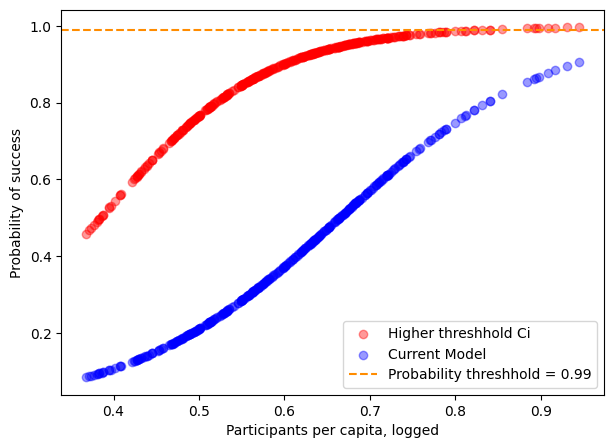

In [17]:
# get current intercept and coefficient
intercept = model.params['Intercept']
coef = model.params['MEMBERSHIPPERCAPITA']

# gett the high coefficient bound of the 95% confidence interval
intercept_high = model.conf_int().loc['Intercept', 1]
coef_high = model.conf_int().loc['MEMBERSHIPPERCAPITA', 1]

print(f'Intercept high: {intercept_high:.4f}') # -3.9563
print(f'Coefficient high: {coef_high:.4f}') # 10.2866

# plot the predictions with the high and low values of the coefficients
plt.figure(figsize=(7, 5))
plt.xlabel('Participants per capita, logged')
plt.ylabel('Probability of success')
plt.scatter(x_values, expit(intercept_high + coef_high * x_values), color='red', label='Higher threshhold Ci', alpha=0.4)
plt.scatter(x_values, expit(intercept + coef * x_values), color='blue', label='Current Model', alpha=0.4)
desired_prob_value = 0.99
plt.axhline(y=desired_prob_value, color='darkorange', linestyle='--', label=f'Probability threshhold = {desired_prob_value}')
plt.legend()
_ = plt.show()

With the new coefficients, the model clearly reaches the 99% probability mark with some points surpassing it. Let's calculate the membership per capita levels needed to reach a 99% probability of success.

- Since the formula for the logisitic regression probability of success is: $$ p(x) = \frac {1}{1+e^{-(Intercept + coef * MPC)}} $$ 
and the intercept, coefficient and desired probability (p(x)) values are known, solving for MPC we get:

$$ MPC = \frac{\ln\left(\frac{p(x)}{1 - p(x)}\right) - \text{Intercept}}{\text{coef}} $$

Where:
- 'MPC' represents the 'MEMBERSHIPPERCAPITA' value.
- p(x) denotes the desired probability of success.
- 'Intercept' is the intercept of the logistic regression model.
- 'coef' is the coefficient for 'MEMBERSHIPPERCAPITA'.

In [18]:
# Desired probability of success
desired_prob = 0.99

# Given coefficients
intercept_high = -3.9563
coef_high = 10.2866

# Calculate the 'MEMBERSHIPPERCAPITA' value for the desired probability
x_value = (np.log(desired_prob / (1 - desired_prob)) - intercept_high) / coef_high

print(f"The 'MEMBERSHIPPERCAPITA' value needed for a {desired_prob * 100}% probability of success is: {x_value:.4f}")

The 'MEMBERSHIPPERCAPITA' value needed for a 99.0% probability of success is: 0.8313


- Looks like the membership per capita levels needed to reach a 99% probability of success are 0.8313. Let's examine our original campaign data to see which campaigns have a membership per capita number at or above our finding.

In [19]:
campaigns_above_threshold = campaigns[campaigns['MEMBERSHIPPERCAPITA'] >= x_value]
campaigns_above_threshold[['LOCATION', 'TARGET', 'EYEAR', 'SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION', 'MEMBERSHIPPERCAPITA']].sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)

,LOCATION,TARGET,EYEAR,SUCCESS,PERCENTAGEPOPULARPARTICIPATION,MEMBERSHIPPERCAPITA
314,Sudan,Jaafar Nimiery,1985.0,1.0,0.085106,0.854833
4,Albania,Communist regime,1991.0,1.0,0.091068,0.840339
187,Latvia,Communist regime,1991.0,1.0,0.094319,0.840363
98,Egypt,President Morsi,2013.0,1.0,0.155889,0.898510
342,Tunisia,Council negotiating end to political crisis,2013.0,1.0,0.179470,0.894139
104,Estonia,Communist regime,1991.0,1.0,0.192146,0.884335
194,Lebanon,Government of Prime Minister Fouad Siniora,2008.0,1.0,0.194598,0.892521
192,Lebanon,Syrian forces,2005.0,1.0,0.250824,0.909004
384,Zambia,British rule,1963.0,1.0,0.285063,0.916722
14,Argentina,military junta,1983.0,1.0,0.302013,0.930431


- There are 11 campaigns that have a probability of success of at least 99% based on the model. The campaigns are listed above. We shall now obtain the lowest participation level of those campaigns.

In [20]:
lowest_participation_above_mmpc_threshold = campaigns_above_threshold.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True).iloc[0]['PERCENTAGEPOPULARPARTICIPATION']
print(f'The lowest participation percentage above the MMPC threshold is: {lowest_participation_above_mmpc_threshold * 100:.4f}%')


The lowest participation percentage above the MMPC threshold is: 8.5106%


- The lowest participation level found in our filtered data is 8.5106% which is the tipping point of participation needed to reach a 99% probability of success.
- This is significantly higher than 3.5% proposed in the rule. However, as Erica Chenoweth mentions in her [Q&A publication](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf) it is important to note that the 3.5% rule is not a hard cutoff but rather a guideline. As we have seen, there are campaigns that have succeeded with participation levels below 3.5% and campaigns that have failed with participation levels above 3.5%. The 3.5% rule is a good rule of thumb but it is not a hard rule.
- Another thing to note is that the rule was calculated using a previous version of the dataset containing fewer observations from 1900-2006. With the new data available, even Chenoweth points that some exceptions appear.

# 5. Nonviolent Resistance and Target Regime Type

- Finally , we will examine whether nonviolent resistance remains significant even if we control for the regime type. We will run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends. By including all of these variables, we can further isolate the effect of nonviolent resistance on the probability of success and validate some of our early findings.

- To obtain the Polity V score of the campaign target, we will use the [Polity IV Project](https://www.systemicpeace.org/polityproject.html) dataset. We will use the Polity2 score which is a 21-point summary measure of a state’s democratic and autocratic qualities. The score ranges from -10 (hereditary monarchy) to +10 (consolidated democracy). We will use the score for every country for the year the campaign ended.

In [21]:
# read polity data in excel
polity = pd.read_excel('../assignment_2023_2/p5v2018.xls')

# make sure the year column is an integer
campaigns['EYEAR'] = campaigns['EYEAR'].astype(int)

# rename country column in polity to LOCATION
polity.rename(columns={'country': 'LOCATION'}, inplace=True)

# rename year column in polity to EYEAR
polity.rename(columns={'year': 'EYEAR'}, inplace=True)

# Add the polity column from the polity df to the campaigns dataframe only for the year the campaign ended
merged_data = pd.merge(campaigns, polity, on=['LOCATION', 'EYEAR'], how='left')


- Arbitrairly merging 2 dataframes based on a string value is risky. Let's inspect the data for missing values.

In [22]:
# rename polity2 column to POLITY
merged_data.rename(columns={'polity2': 'POLITY'}, inplace=True)

# get the percentage of missing polity scores
percentage_missing = merged_data['POLITY'].isna().sum() / merged_data.shape[0]
print(f'{percentage_missing * 100:.2f}% of the data has missing polity score.')


21.84% of the data has missing polity score.


- If we merge and inspect the data, we notice that ~22% of the observations have a missing Polity2 score. This is a significant portion of the data and we cannot simply drop them. Instead, we will try to fill in the missing values.

- The main problems seem to be the lack of exact name matching between countries in the 2 datasets and the fact that some countries are missing in the Polity data. Lets see the problematic countries.

In [23]:
# get locations with missing polity score
print(merged_data[merged_data['POLITY'].isna()][['LOCATION']].value_counts().head(5))
# how many missing polity scores are there total
print("\nTotal rows with missing polity values:")
print(merged_data['POLITY'].isna().sum())


LOCATION                    
Burma/Myanmar                   6
South Korea                     4
Democratic Republic of Congo    4
Zaire/DRC                       3
Sudan                           3
Name: count, dtype: int64

Total rows with missing polity values:
83


- We can solve part of the problem by matching the country names in the 2 datasets. 
- We will use the [thefuzz](https://github.com/seatgeek/thefuzz) library to calculate approximate string matching scores and rename the countries in the NAVCO dataset according to the best match in the Polity dataset. 

In [24]:
#  for each location that is problematic in the merged data,
#  use thefuzz to find the closest match in the polity data
from thefuzz import process

# get all problematic locations in navco data
problematic_locations = merged_data[merged_data['POLITY'].isna()][['LOCATION']]['LOCATION'].unique()

print(f'Number of unique problematic locations: {len(problematic_locations)}')

polity_locations = polity['LOCATION'].unique()

# for each problematic location that find the closest match in the polity data,
# and replace the location name in navco with the closest match in polity
for index,location in enumerate(problematic_locations):
    closest_match = process.extractOne(query=location, choices=polity_locations)[0]
    if index < 10:
        print(f'Closest match for {location} is {closest_match}. Replacing in NAVCO...')
    campaigns.loc[campaigns['LOCATION'] == location, 'LOCATION'] = closest_match

# remerge the data but this time with the corrected location names
merged_data = pd.merge(campaigns, polity, on=['LOCATION', 'EYEAR'], how='left')

# get only relevant columns
merged_reg_data = merged_data[['LOCATION', 'EYEAR', 'polity2', 'SUCCESS', 'VIOL', 'NONVIOL' , 'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'POPULATION']]
# rename polity2 to POLITY
merged_reg_data.rename(columns={'polity2': 'POLITY'}, inplace=True)


Number of unique problematic locations: 52
Closest match for Afghanistan is Afghanistan. Replacing in NAVCO...
Closest match for Angola is Angola. Replacing in NAVCO...
Closest match for Bosnia-Herzegovina is Bosnia. Replacing in NAVCO...
Closest match for Brunei is Burundi. Replacing in NAVCO...
Closest match for Burma/Myanmar is Myanmar (Burma). Replacing in NAVCO...
Closest match for Cambodia is Cambodia. Replacing in NAVCO...


Closest match for Congo-Brazzaville (ROC) is Congo-Brazzaville. Replacing in NAVCO...
Closest match for Cyprus is Cyprus. Replacing in NAVCO...
Closest match for Democratic Republic of Congo is Congo-Brazzaville. Replacing in NAVCO...
Closest match for East Germany is Germany East. Replacing in NAVCO...


- Upon inspection , we notice that the fuzzy matching makes some mistakes, but most are acceptable since the location is not present in the list of countries in the polity dataset for the given year. For example Iceland is converted to Ireland but we have no data for Iceland in the polity dataset.

- Let's see if we had any success in filling in the missing values.

In [25]:
# check if there are still locations with missing polity score
percentage_missing = merged_reg_data['POLITY'].isna().sum() / merged_data.shape[0]
print(f'{percentage_missing * 100:.2f}% of the data has missing polity score.')

# 13% of the data still has missing polity score --> drop these rows as we have no data on their polity score
merged_reg_data = merged_reg_data.dropna(subset=['POLITY'])

13.42% of the data has missing polity score.


- The percentage of missing rows dropped to 13% which is a significant improvement. Taking into account that a portion of the missing values is due to the lack of data for some countries, we can say that we have succesfully filled in most of the missing values. We can drop the rest.

In [26]:
merged_reg_data = merged_reg_data.dropna(subset=['POLITY'])
merged_reg_data.shape

(329, 9)

- We are now ready to run the logistic regression.

In [27]:
# logit model
model = logit("SUCCESS ~ NONVIOL + POLITY + np.log(PERCENTAGEPOPULARPARTICIPATION) + np.log(POPULATION) ", data=merged_reg_data).fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.535755
         Iterations 6
                                  Results: Logit
Model:                    Logit                  Method:                 MLE       
Dependent Variable:       SUCCESS                Pseudo R-squared:       0.195     
Date:                     2023-12-04 11:47       AIC:                    362.5270  
No. Observations:         329                    BIC:                    381.5073  
Df Model:                 4                      Log-Likelihood:         -176.26   
Df Residuals:             324                    LL-Null:                -218.95   
Converged:                1.0000                 LLR p-value:            1.2634e-17
No. Iterations:           6.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
---------

- The nonviolence indicator is still statistically significant with a p-value of 0.0059 and a positive coefficient of 0.7847. This means that despite the target regime, nonviolent resistance is still a significant predictor of success. This validates our previous findings and shows that nonviolent resistance is a powerful tool for change especially in the modern era.

- Some last thing to note is that the log of the population is not statistically significant with a p-value of 0.0975 and we could drop it from the model to reduce complexity especially since we have the polity score and participation as a control variable.
- Also, the polity score , although statistically significant does not hold a lot of predictive power. This is probably due to the fact that the polity score is a summary measure of a state’s democratic and autocratic qualities and not a measure of the regime type. For example, a country with a polity score of 0 could be a democracy or an autocracy. This is a limitation of the model that could be improved by using a more specific measure of the regime type.